### Regular Power

In [20]:
def pangkat_biasa(a,n):
    if(n == 0 and a!=0):
        return 1
    if(a == 0 and n !=0):
        return 0
    else:
        return a * pangkat_biasa(a,n-1)

### Binary Exponentiation Power

In [21]:
def power(A, B):
    if B == 0:
        return 1
    res = power(A, B // 2)
    if B % 2:
        return res * res * A
    else:
        return res * res

### Analysis

In [36]:
import timeit
import matplotlib.pyplot as plt
import pandas as pd

def measure_execution_time():
    results = []

    # Rentang nilai a dan n
    a_range = range(1, 11)  # a dari 1 hingga 10
    n_range = range(1, 21)  # n dari 1 hingga 20

    for a in a_range:
        for n in n_range:
            # Mengukur waktu untuk pangkat_biasa
            time_biasa = timeit.timeit(lambda: pangkat_biasa(a, n), number=1000)
            # Mengukur waktu untuk power
            time_power = timeit.timeit(lambda: power(a, n), number=1000)

            # Simpan hasilnya dalam list
            results.append((a, n, time_biasa, time_power))

    return results

# Mengambil hasil pengukuran
execution_times = measure_execution_time()

# Memasukkan hasil pengukuran ke dalam DataFrame
df = pd.DataFrame(execution_times, columns=['a', 'n', 'pangkat_biasa_time', 'power_time'])

# Menampilkan tabel hasil
df



,a,n,pangkat_biasa_time,power_time
0,1,1,0.000357,0.000495
1,1,2,0.000494,0.000631
2,1,3,0.000648,0.000637
3,1,4,0.000771,0.000923
4,1,5,0.000952,0.000880
...,...,...,...,...
195,10,16,0.002508,0.001014
196,10,17,0.002808,0.001264
197,10,18,0.002641,0.001005
198,10,19,0.003201,0.001186


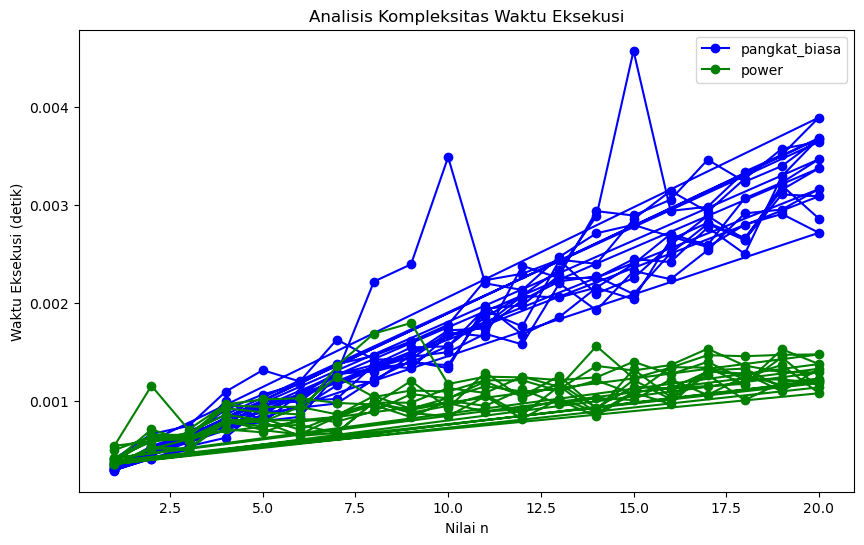

In [37]:
# Membuat plot untuk visualisasi
plt.figure(figsize=(10, 6))

# Plot waktu eksekusi pangkat_biasa
plt.plot(df['n'], df['pangkat_biasa_time'], label='pangkat_biasa', color='blue', marker='o')

# Plot waktu eksekusi power
plt.plot(df['n'], df['power_time'], label='power', color='green', marker='o')

# Menambahkan judul dan label
plt.title('Analisis Kompleksitas Waktu Eksekusi')
plt.xlabel('Nilai n')
plt.ylabel('Waktu Eksekusi (detik)')
plt.legend()

# Menampilkan plot
plt.show()

### Regular Fibonacci

In [23]:
def fibo(n):
    if(n == 1 or n == 2):
        return 1
    else:
        return fibo(n - 1) + fibo(n - 2)

### Fibonacci With Memoization (DP)

In [24]:
memo = [-1 for x in range(1000)]
memo[0] = 0
memo[1] = 1
def fibo_with_memo(n):
    if(memo[n] != -1):
        return memo[n]
    else:
        if(n>0):
            memo[n] = fibo_with_memo(n - 1) + fibo_with_memo(n - 2)
        else:
            memo[n] = 0
        return memo[n]

### Fibo with Iterative

In [31]:

def fibo_with_iterative(n, Fibo_it = dict()):
    Fibo_it[0] = 0
    Fibo_it[1] = 1
    Fibo_it[2] = 1
    for i in range(3,n+1):
        Fibo_it[i] = Fibo_it[i - 1] + Fibo_it[i - 2]
    return Fibo_it[n]

In [34]:
def measure_execution_time_fibo():
    results = []
    n_range = range(1, 21)  # Rentang n dari 1 hingga 20

    for n in n_range:
        # Mengukur waktu untuk fibo (rekursi biasa)
        time_fibo = timeit.timeit(lambda: fibo(n), number=10)

        # Mengukur waktu untuk fibo_with_memo (memoization)
        time_fibo_memo = timeit.timeit(lambda: fibo_with_memo(n), number=10)

        # Mengukur waktu untuk fibo_with_iterative (iteratif)
        time_fibo_iterative = timeit.timeit(lambda: fibo_with_iterative(n), number=10)

        # Simpan hasilnya dalam list
        results.append((n, time_fibo, time_fibo_memo, time_fibo_iterative))

    return results

# Mengambil hasil pengukuran
execution_times = measure_execution_time_fibo()

# Memasukkan hasil pengukuran ke dalam DataFrame
df_2 = pd.DataFrame(execution_times, columns=['n', 'fibo_time', 'fibo_memo_time', 'fibo_iterative_time'])

# Menampilkan tabel hasil
df_2



,n,fibo_time,fibo_memo_time,fibo_iterative_time
0,1,0.000010,0.000011,0.000017
1,2,0.000005,0.000007,0.000011
2,3,0.000009,0.000007,0.000016
3,4,0.000011,0.000004,0.000013
4,5,0.000015,0.000004,0.000015
5,6,0.000032,0.000006,0.000022
6,7,0.000037,0.000004,0.000021
7,8,0.000066,0.000005,0.000024
8,9,0.000098,0.000004,0.000026
9,10,0.000158,0.000004,0.000026


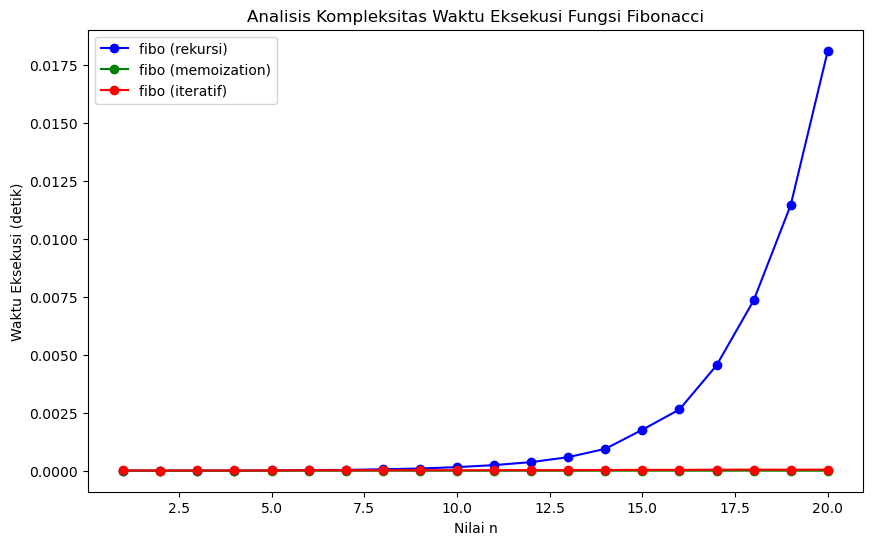

In [35]:
# Membuat plot untuk visualisasi
plt.figure(figsize=(10, 6))

# Plot waktu eksekusi untuk fibo (rekursi biasa)
plt.plot(df_2['n'], df_2['fibo_time'], label='fibo (rekursi)', color='blue', marker='o')

# Plot waktu eksekusi untuk fibo_with_memo (memoization)
plt.plot(df_2['n'], df_2['fibo_memo_time'], label='fibo (memoization)', color='green', marker='o')

# Plot waktu eksekusi untuk fibo_with_iterative (iteratif)
plt.plot(df_2['n'], df_2['fibo_iterative_time'], label='fibo (iteratif)', color='red', marker='o')

# Menambahkan judul dan label
plt.title('Analisis Kompleksitas Waktu Eksekusi Fungsi Fibonacci')
plt.xlabel('Nilai n')
plt.ylabel('Waktu Eksekusi (detik)')
plt.legend()

# Menampilkan plot
plt.show()